In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# mapping of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# preprocess data by scale the pixel values to range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
# Layers extract representations from the data
# Deep learning chains layers
# Each layer have parameters to learn during training
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transforms the images from 2d array to 1d array, no parameters to learn
    tf.keras.layers.Dense(128, activation='relu'), # fully connected layer of 128 nodes 
    tf.keras.layers.Dense(10) # returns a logits array of len 10, each node conains a score indicating the image belong to one of 10 classes
    
])


model.compile(optimizer='adam', # update model based on the data and loss function
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # used to evaluate model in training and testing steps

model.fit(train_images, train_labels, epochs=10) # fit the model to training data

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4994 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3742 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3113 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2924 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2777 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2438 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.236

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 0s - loss: 0.3450 - accuracy: 0.8813 - 222ms/epoch - 710us/step


In [24]:
# accuracy on test set is less than accuracy in training set meaning the model is overfitted on the training set

# Used the trained model to classify images
# Apply a softmax layer to convert the model's linear outputs to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 617us/step


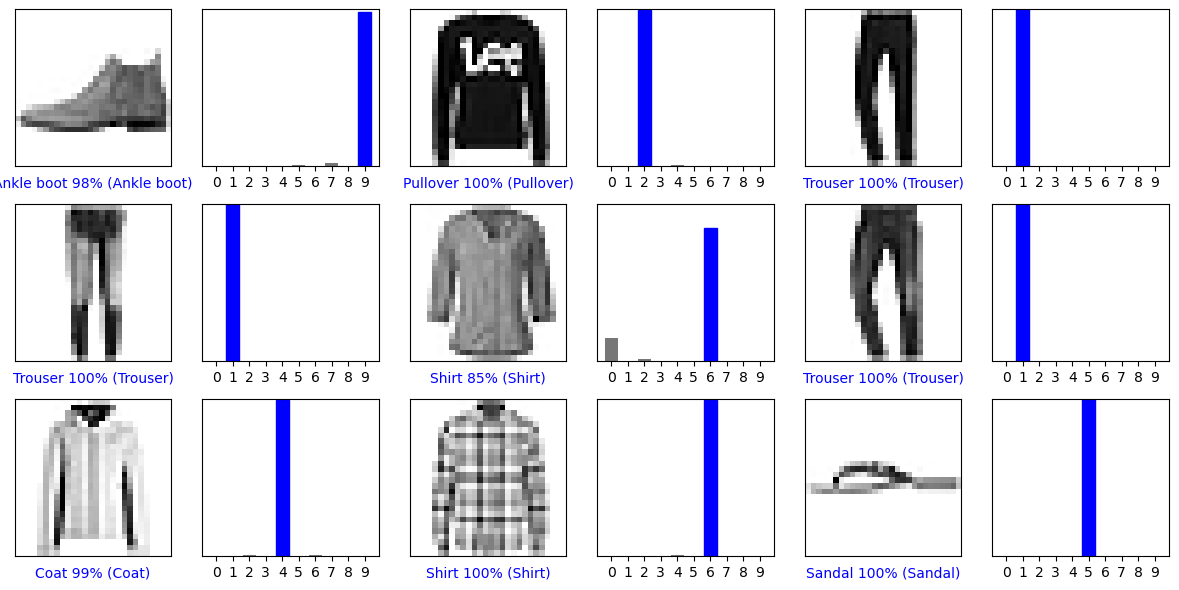

In [28]:
# graph the predictions 
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()